In [1]:
from preamble import *

# Cancer data

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 점수 : 1.000
테스트 세트 점수 : 0.965


In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import cross_val_score

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

cvscores = cross_val_score(gbrt, X, y, cv=10)
print("테스트 세트 정확도 CV = 10 : {:.3f}".format(cvscores.mean()))

cvscores = cross_val_score(gbrt, X, y, cv=5)
print("테스트 세트 정확도 CV = 5 : {:.3f}".format(cvscores.mean()))

테스트 세트 정확도 CV = 10 : 0.890
테스트 세트 정확도 CV = 5 : 0.850


# 파라미터 조정

In [4]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(gbrt.score(X_test, y_test)))
cvscores = cross_val_score(gbrt, X, y, cv=10)
print("테스트 세트 정확도 CV = 10 : {:.3f}".format(cvscores.mean()))
cvscores = cross_val_score(gbrt, X, y, cv=5)
print("테스트 세트 정확도 CV = 5 : {:.3f}".format(cvscores.mean()))

훈련 세트 점수 : 0.991
테스트 세트 점수 : 0.972
테스트 세트 정확도 CV = 10 : 0.890
테스트 세트 정확도 CV = 5 : 0.870


In [5]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(gbrt.score(X_test, y_test)))
cvscores = cross_val_score(gbrt, X, y, cv=10)
print("테스트 세트 정확도 CV = 10 : {:.3f}".format(cvscores.mean()))
cvscores = cross_val_score(gbrt, X, y, cv=5)
print("테스트 세트 정확도 CV = 5 : {:.3f}".format(cvscores.mean()))

훈련 세트 점수 : 0.988
테스트 세트 점수 : 0.965
테스트 세트 정확도 CV = 10 : 0.870
테스트 세트 정확도 CV = 5 : 0.860


# GradientBoosting vs. RandomForest

In [6]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

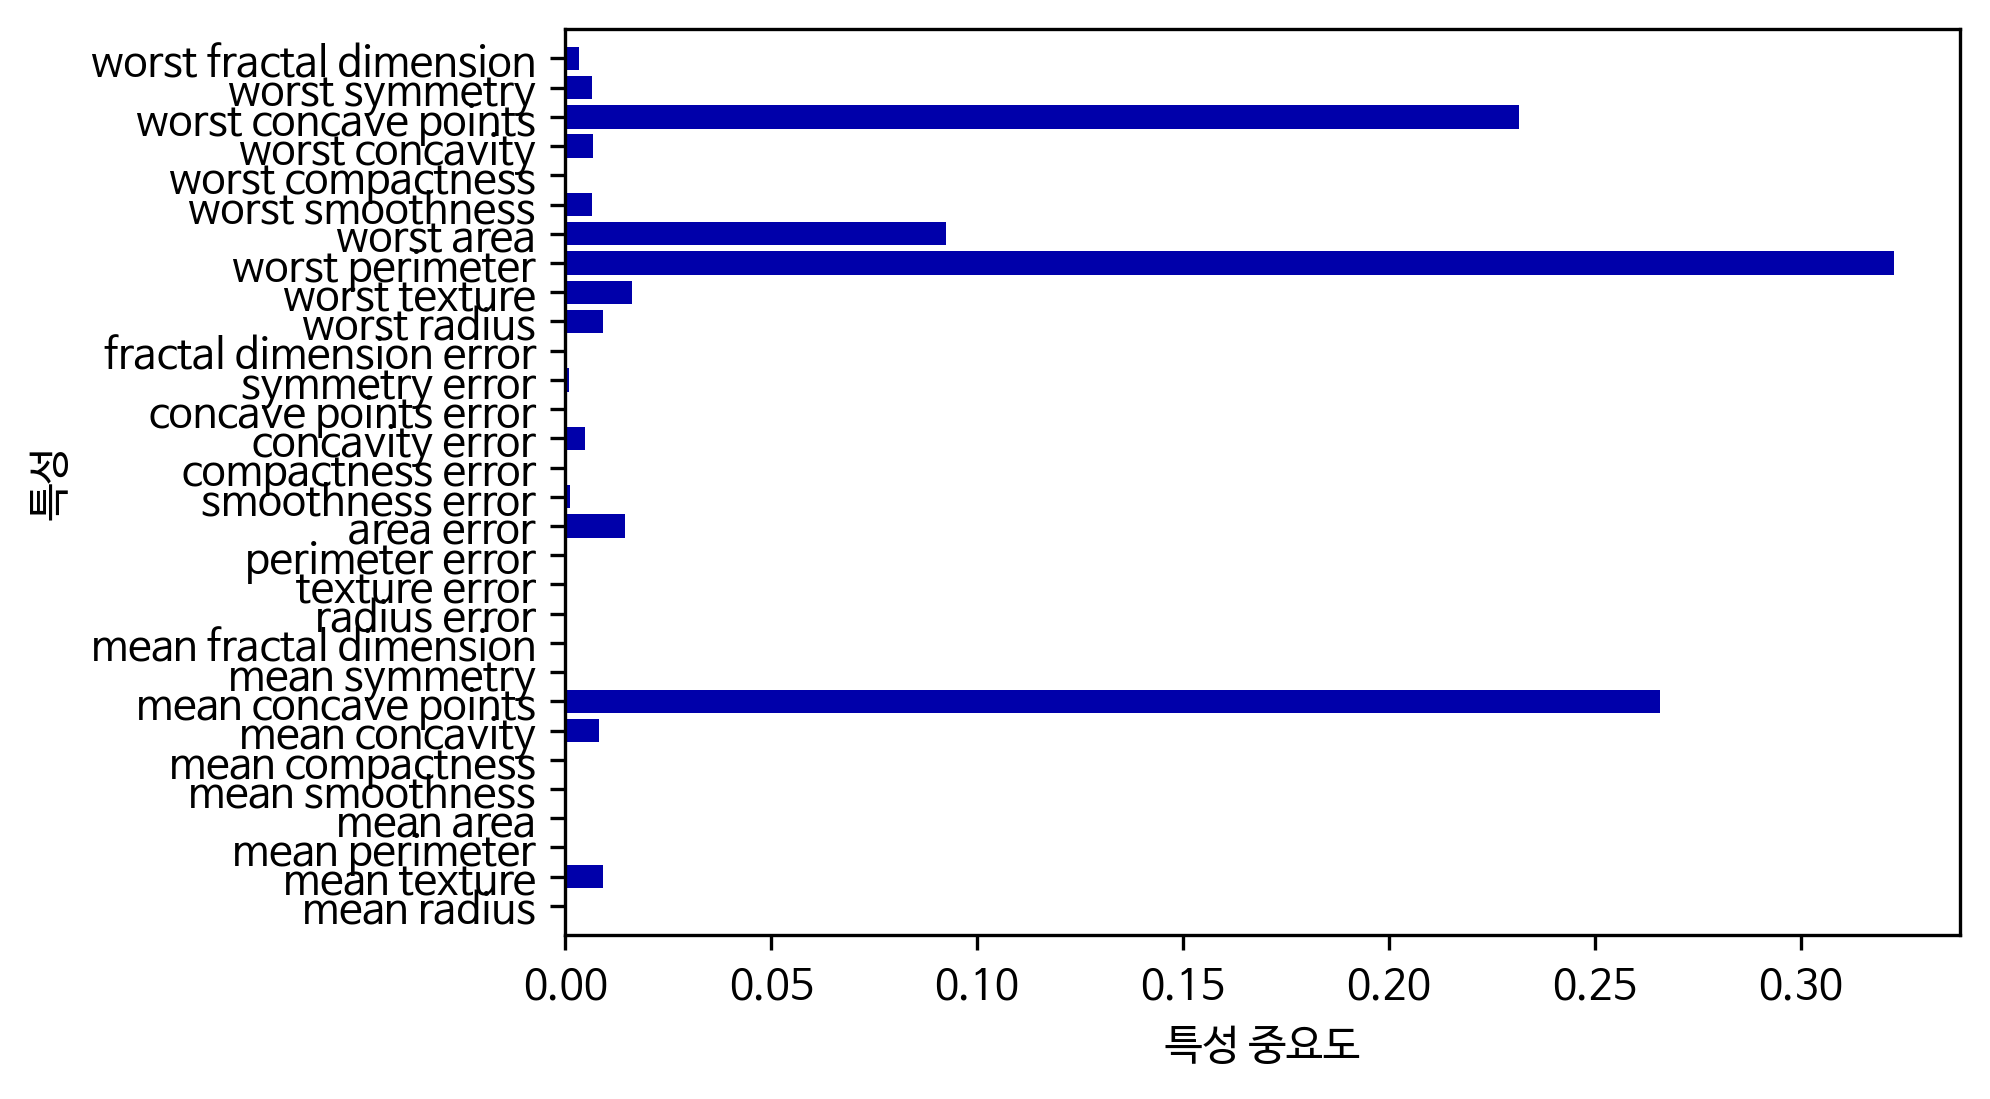

In [7]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

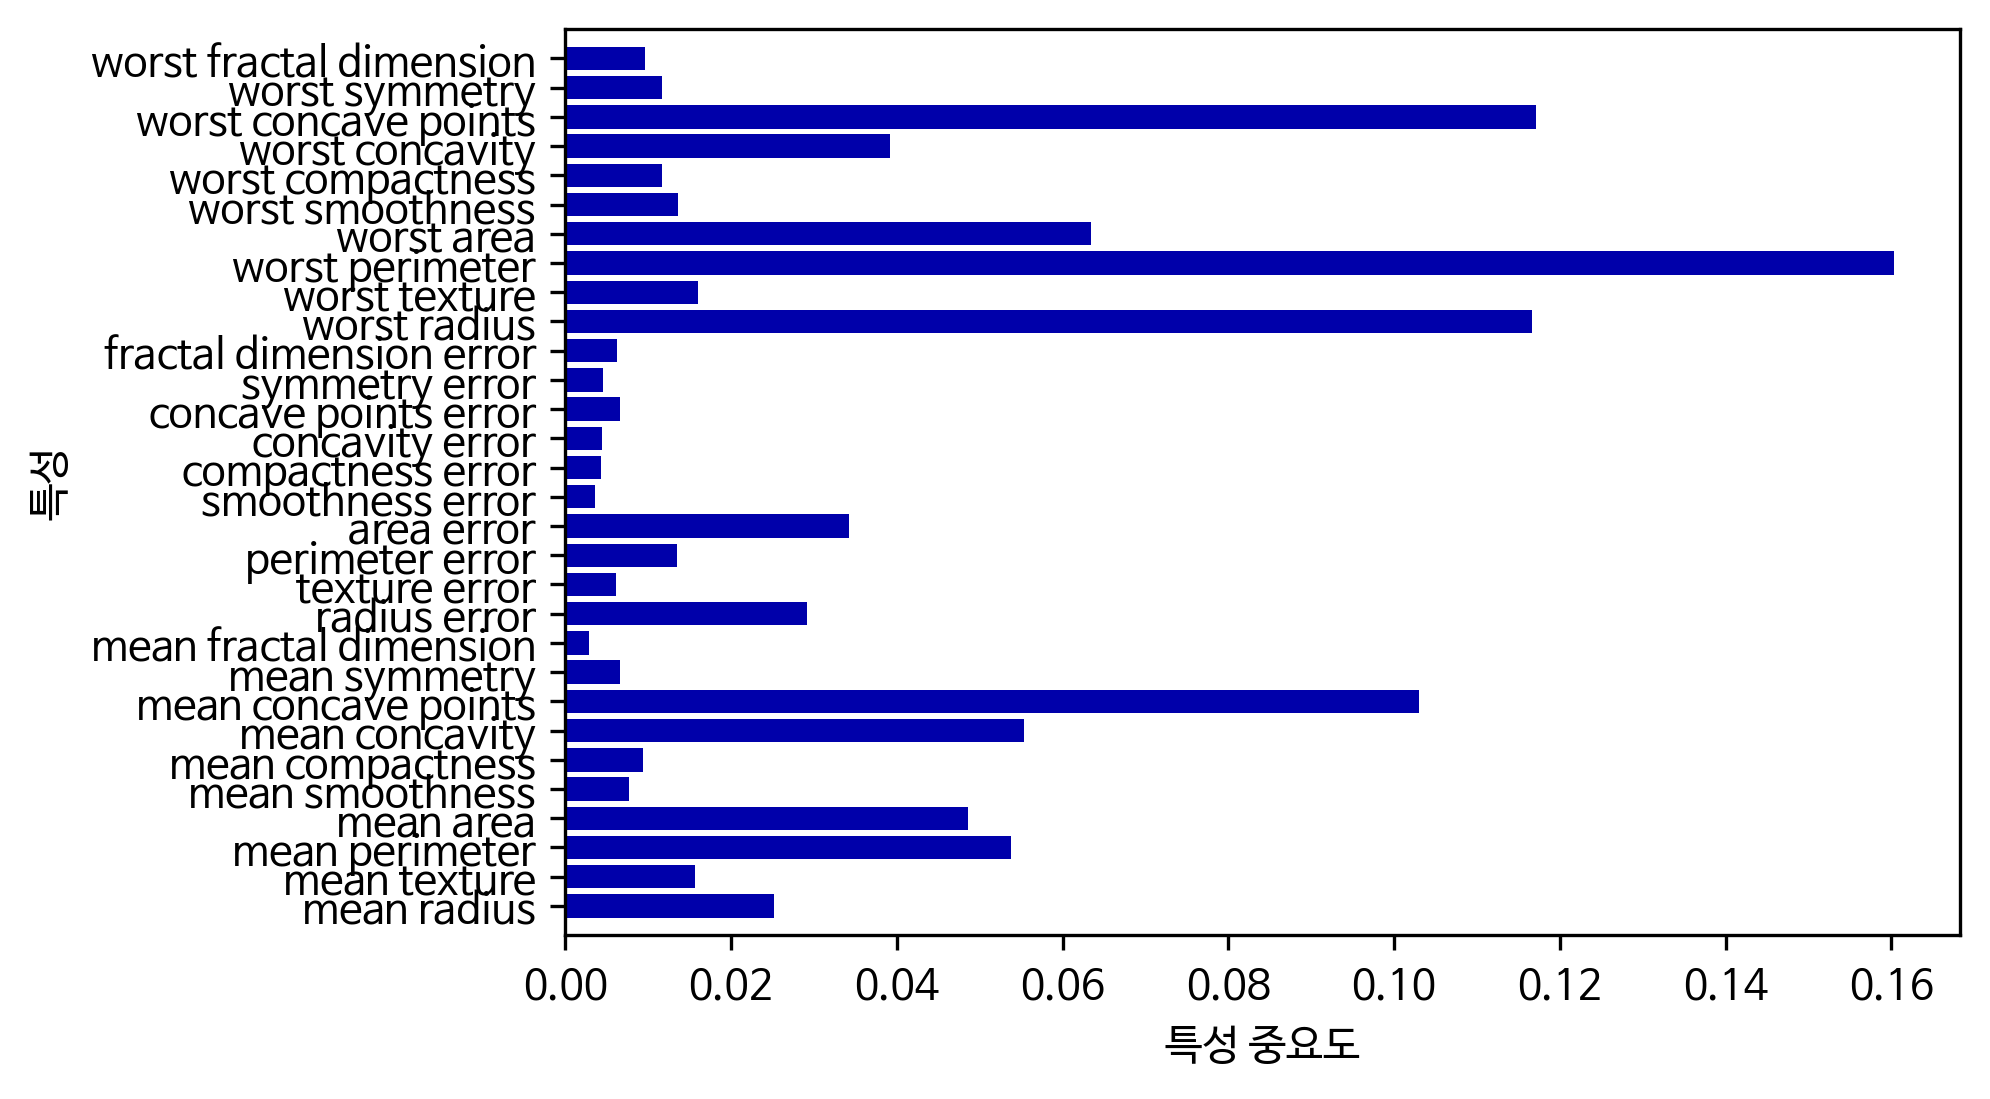

In [8]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

plot_feature_importances_cancer(forest)

# Ensemble Method

In [9]:
# 데이터 준비
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 보팅클래스 : 랜덤포레스트, 로지스틱회귀, 결정트리
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(solver='lbfgs', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

voting_clf_h = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)],
    voting='hard')
voting_clf_s = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)],
    voting='soft')

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, dt_clf, voting_clf_h, voting_clf_s):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904
VotingClassifier 0.904


# OOB(Out-of-bag)평가

In [10]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True,
    oob_score=True,
    random_state=40)
bag_clf.fit(X_train, y_train)

# oob-score 출력
print("oob_score : ", bag_clf.oob_score_)

# decisiontree bagging
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

oob_score :  0.8986666666666666


0.912

# XGBoost(Extreme Gradient Boosting)

In [11]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators=100, max_depth=3, random_state=42, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

# LinearSVC

C:\Users\wkdwl\Anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

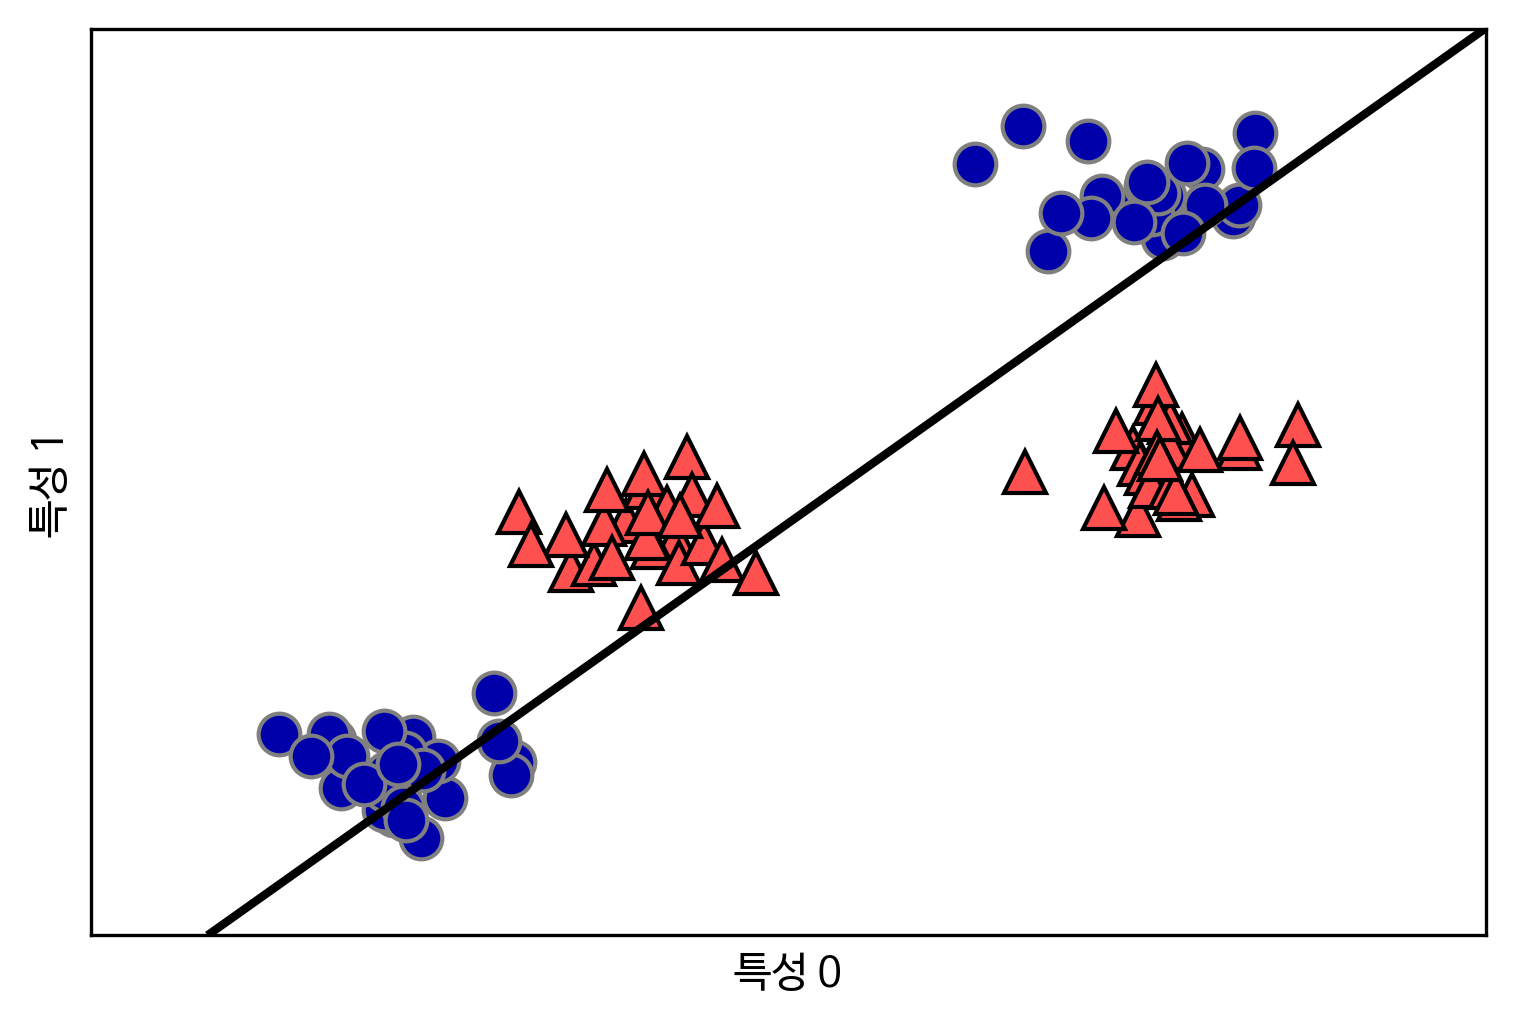

In [12]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
 
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# plot confidence score of feature1 and feature2

Text(0.5, 0, '특성1 ** 2')

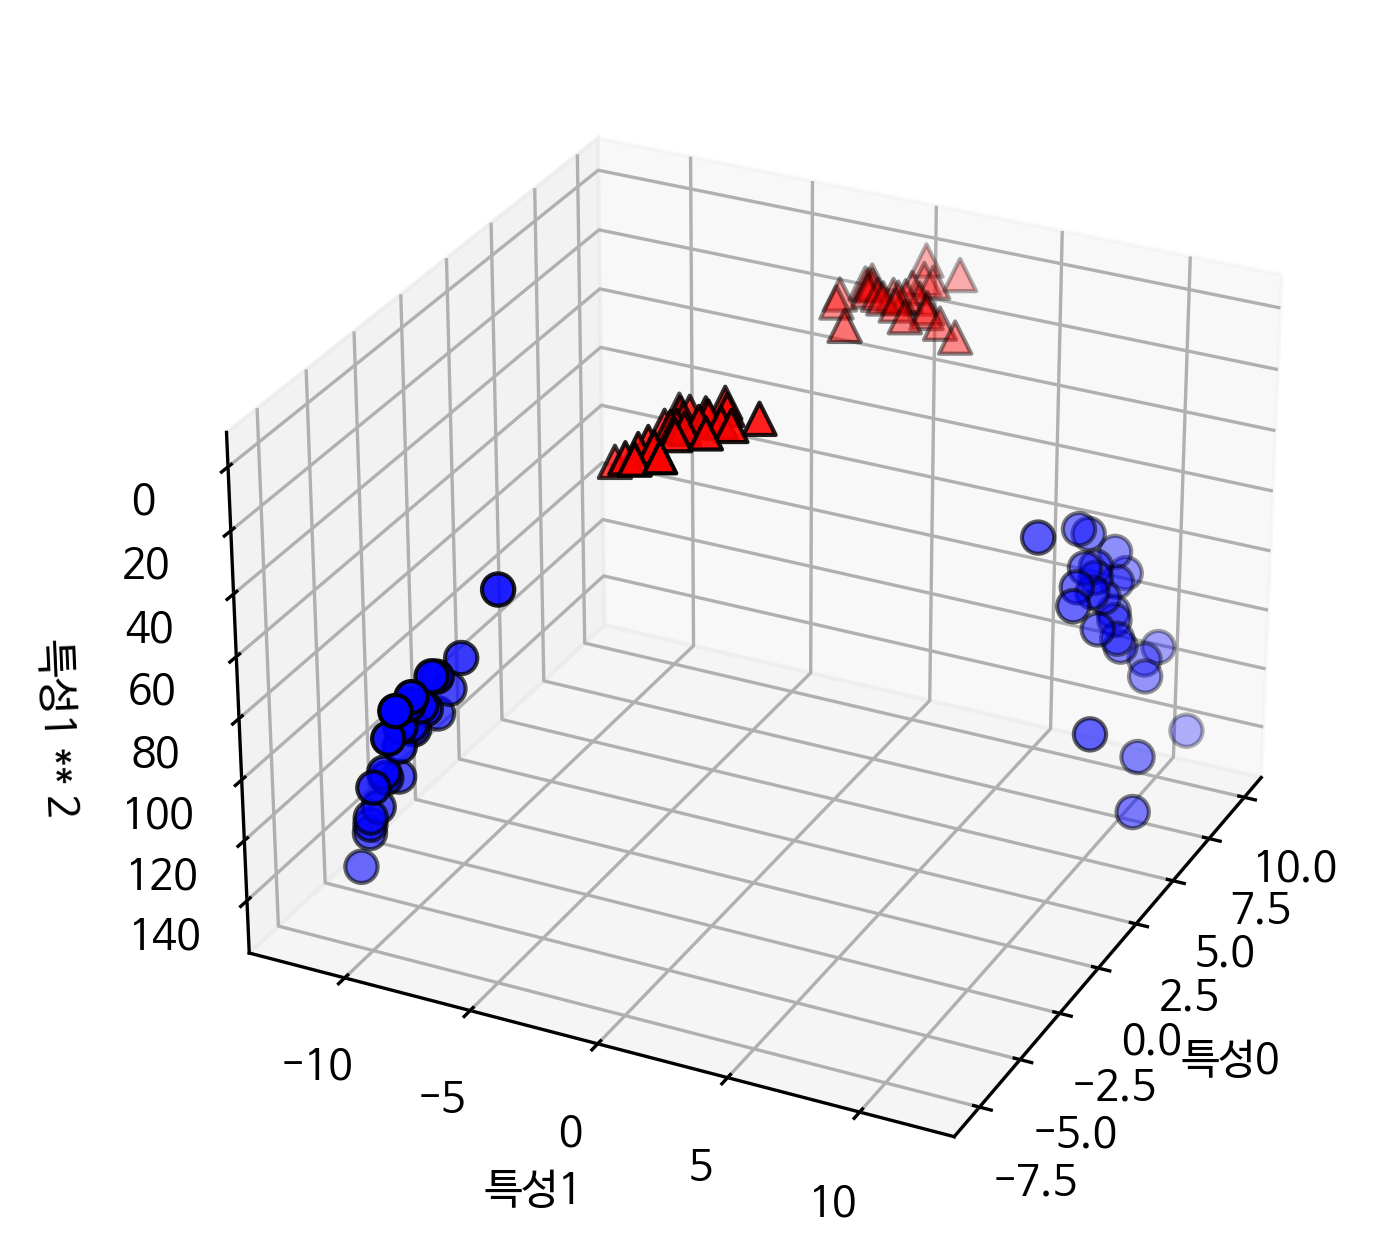

In [13]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0.5, 0, '특성1 ** 2')

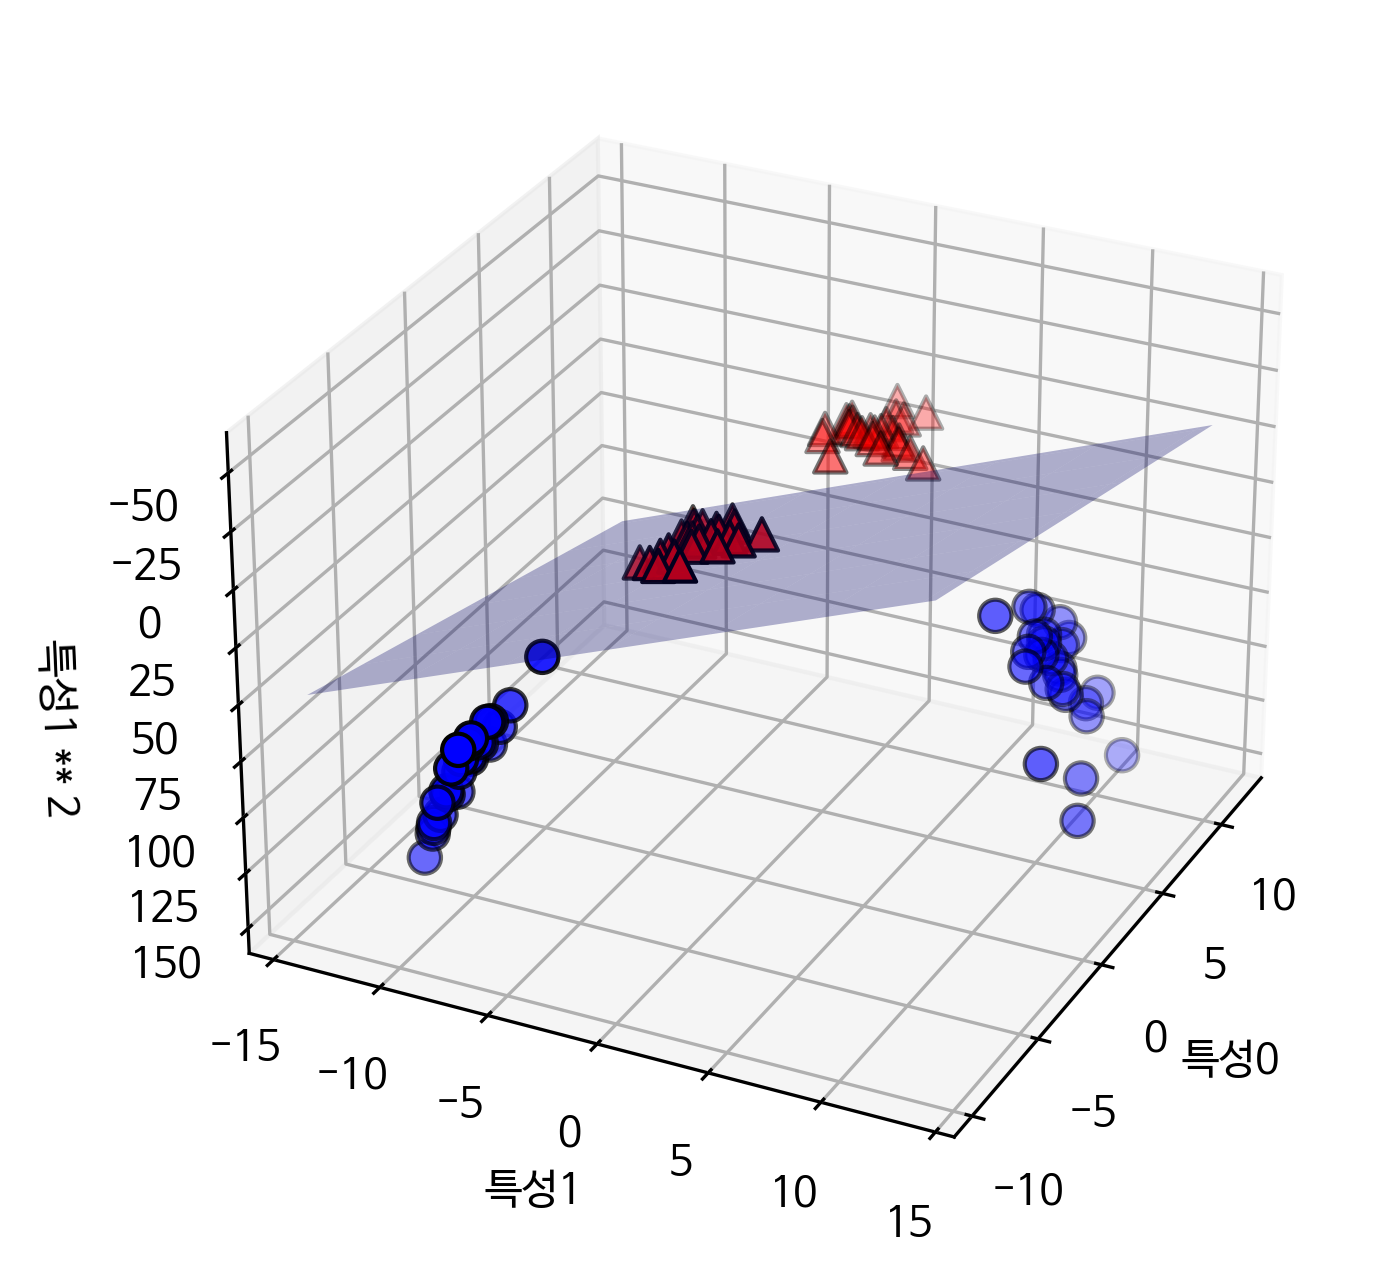

In [14]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

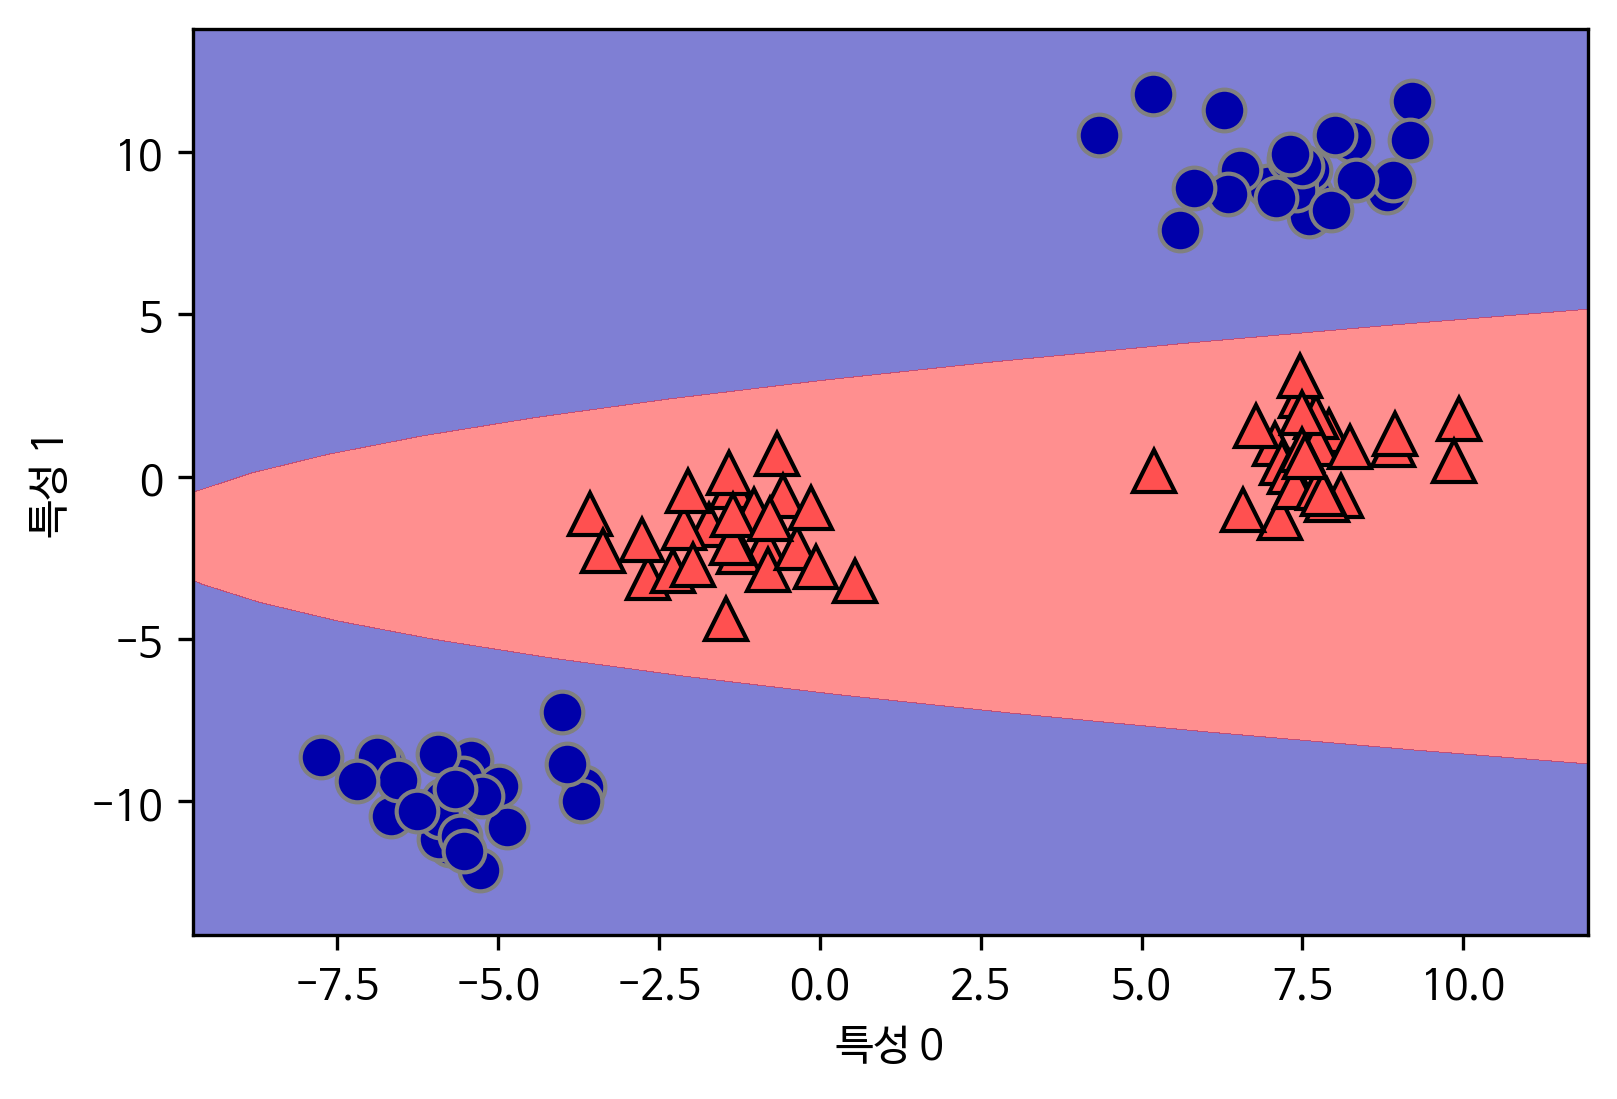

In [15]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# cancer data

In [16]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(svc.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(svc.score(X_test, y_test)))

훈련 세트 점수 : 0.904
테스트 세트 점수 : 0.937


# 데이터 전처리

In [17]:
# 훈련 세트에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별(최대값-최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최소값을 빼고 범위를 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1
X_train_scaled = (X_train - min_on_training) / range_on_training

# 테스트 세트에도 같은 작업을 적용
# 훈련 세트에서 계산한 최솟값과 범위를 사용
X_test_scaled = (X_test - min_on_training) / range_on_training

# 전처리 후 SVC

In [18]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 점수 : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 점수 : {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.972


In [19]:
svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 점수 : {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 점수 : {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 점수 : 0.988
테스트 세트 점수 : 0.972


# LinearSVC vs. SVC for IRIS

In [20]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC, SVC

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

c_list = [0.1, 1, 10, 100]
linearsvc_score = []
svc_score = []

for c in c_list:
    linearsvc = LinearSVC(C=c, max_iter=1000000).fit(X_train, y_train)
    svc = SVC(C=c, max_iter=1000000).fit(X_train, y_train)
    linearsvc_score.append(linearsvc.score(X_test, y_test))
    svc_score.append(svc.score(X_test, y_test))
    
pd.DataFrame({'C':c_list, 'linearsvc':linearsvc_score, 'svc':svc_score})

,C,linearsvc,svc
0,0.1,1.0,0.97
1,1.0,1.0,1.00
2,10.0,1.0,1.00
3,100.0,1.0,0.97


C 하이퍼파라미터를 조정하면서 IRIS 데이터에 대해서 LinearSVC와 SVC를 적용시켜보았다.

C가 1, 10일때 두 모델 모두 정확도 1을 달성했다.

가중치가 수렴하지 않아서 max_iter는 1000000을 주었다.

데이터가 너무 단순하여 두 모델의 성능을 비교하기 어려웠다.

# LinearSVR vs. SVR for Boston Housing Price

In [21]:
from sklearn.datasets import load_boston
from sklearn.svm import LinearSVR, SVR

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=42)

linearsvr_c_list = [0.01, 0.1, 1, 10]
svr_c_list = [1000, 10000, 100000]
linearsvr_score = []
svr_score = []

for linearsvr_c in linearsvr_c_list:
    linearsvr = LinearSVR(C=linearsvr_c, max_iter=1000000).fit(X_train, y_train)
    linearsvr_score.append(linearsvr.score(X_test, y_test))
    
for svr_c in svr_c_list:
    svr = SVR(C=svr_c, max_iter=1000000).fit(X_train, y_train)
    svr_score.append(svr.score(X_test, y_test))
    
display(pd.DataFrame({'C':linearsvr_c_list, 'linearsvr':linearsvr_score}))
display(pd.DataFrame({'C':svr_c_list, 'svr':svr_score}))

C:\Users\wkdwl\Anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\wkdwl\Anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\wkdwl\Anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


,C,linearsvr
0,0.01,0.49
1,0.10,0.60
2,1.00,0.59
3,10.00,0.52


,C,svr
0,1000,0.69
1,10000,0.76
2,100000,0.80


C 하이퍼파라미터를 조정하면서 Boston Housing Price 데이터에 대해서 LinearSVR와 SVR를 적용시켜보았다.

LinearSVR는 C가 10일때 R^2 0.61

SVR은 C가 100000일때 R^2 0.8로 최대였다.

특성마다 범위가 서로 달라서 가중치가 수렴하는데 어려움이 있는 것 같아 데이터에 MinMaxScaler를 적용해보았다.

In [22]:
from sklearn.datasets import load_boston
from sklearn.svm import LinearSVR, SVR
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=42)

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

linearsvr_c_list = [1, 10, 100, 1000]
svr_c_list = [1, 10, 100, 1000]
linearsvr_score = []
svr_score = []

for linearsvr_c in linearsvr_c_list:
    linearsvr = LinearSVR(C=linearsvr_c, max_iter=1000000).fit(X_train_scaled, y_train)
    linearsvr_score.append(linearsvr.score(X_test_scaled, y_test))
    
for svr_c in svr_c_list:
    svr = SVR(C=svr_c, max_iter=1000000).fit(X_train_scaled, y_train)
    svr_score.append(svr.score(X_test_scaled, y_test))
    
display(pd.DataFrame({'C':linearsvr_c_list, 'linearsvr':linearsvr_score}))
display(pd.DataFrame({'C':svr_c_list, 'svr':svr_score}))

,C,linearsvr
0,1,0.61
1,10,0.63
2,100,0.61
3,1000,0.61


,C,svr
0,1,0.62
1,10,0.78
2,100,0.84
3,1000,0.81


LinearSVR는 C가 10일때 R^2 0.63

SVR은 C가 100일때 R^2 0.84로 더 높은 수치를 얻을 수 있었다.

Boston Housing Price 데이터에 대해서는 LinearSVR보다 SVR의 성능이 더 좋은 것을 알 수 있다.

# MLP(Multilayer Perceptron)

In [23]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(mlp.score(X_test, y_test)))

훈련 세트 점수 : 0.939
테스트 세트 점수 : 0.916


# z-score 표준화

In [24]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 훈련 데이터의 평균과 표준편차를 이용해 같은 변환을 테스트 세트에도 합니다.
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 점수 : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 점수 : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 점수 : 0.991
테스트 세트 점수 : 0.965


C:\Users\wkdwl\Anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# 반복횟수, alpha

In [25]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 점수 : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 점수 : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 점수 : 1.000
테스트 세트 점수 : 0.972


In [26]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 점수 : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 점수 : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 점수 : 0.988
테스트 세트 점수 : 0.972


# 분류예측의 불확실성 측정

In [27]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [28]:
print("결정 함수의 결과 형태 : {}".format(gbrt.decision_function(X_test).shape))
print("결정 함수 결과 : \n{}".format(gbrt.decision_function(X_test)[:6, :]))
print("예측 확률 : \n{}".format(gbrt.predict_proba(X_test)[:6]))
print("예측 : \n{}".format(gbrt.predict(X_test)))

결정 함수의 결과 형태 : (38, 3)
결정 함수 결과 : 
[[-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.997 -0.135 -1.203]
 [ 0.061 -1.908 -1.928]]
예측 확률 : 
[[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]]
예측 : 
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
